Inanzitutto importiamo le librerie che ci serviranno

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm

Ora importiamo i file

In [2]:
df = pd.read_csv('googleplaystore.csv')
ur = pd.read_csv('googleplaystore_user_reviews.csv')

Adesso vediamo come sono strutturati i dati

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
ur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


Vediamo il numero di righe e colonne

In [5]:
df.shape

(10841, 13)

In [6]:
ur.shape

(64295, 5)

Vediamo come sono fatte le tabelle

In [7]:
df.head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [8]:
ur.head(15)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


Vediamo come sono i dati numerici dei nostri dati

In [9]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [10]:
ur.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


Dopo aver notato che ci sono dei valori nulli li elimino dalle recensioni siccome recensioni nulle non servono

In [11]:
ur2 = ur.dropna(subset=['Sentiment'])

In [12]:
ur2.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000
10,10 Best Foods for You,good you.,Positive,0.70,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.20,0.100000


Ora vediamo quali sono le app con più recensioni

In [13]:
ur2.groupby(['App']).count().sort_values(by= ['Translated_Review'], ascending = False)

,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,
Bowmasters,312,312,312,312
Helix Jump,273,273,273,273
Angry Birds Classic,273,273,273,273
Calorie Counter - MyFitnessPal,254,255,255,255
Duolingo: Learn Languages Free,240,240,240,240
...,...,...,...,...
Draw a Stickman: EPIC 2,1,1,1,1
HD Camera,1,1,1,1
Draw In,1,1,1,1


Le categorie con più applicazioni

In [14]:
x = df.groupby(['Category']).count().sort_values(by= ['App'], ascending = False)
xx =x.head(10)
xx

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Category,,,,,,,,,,,,
FAMILY,1972,1747,1972,1972,1972,1971,1972,1972,1972,1972,1969,1972
GAME,1144,1097,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144
TOOLS,843,734,843,843,843,843,843,843,843,843,841,843
MEDICAL,463,350,463,463,463,463,463,463,463,463,463,463
BUSINESS,460,303,460,460,460,460,460,460,460,460,460,460
PRODUCTIVITY,424,351,424,424,424,424,424,424,424,424,424,424
PERSONALIZATION,392,314,392,392,392,392,392,392,392,392,392,390
COMMUNICATION,387,328,387,387,387,387,387,387,387,387,387,387
SPORTS,384,319,384,384,384,384,384,384,384,384,384,384


Ora creiamo un df da utilizzare senza duplicati

In [15]:
df_wd = df.drop_duplicates(subset= 'App')

Raggruppiamo tutte le applicazioni per vedere chi ha il numero di recensioni

In [16]:
ur_sentiment = ur2.groupby(by= ['App']).count().sort_values(by= ['Sentiment'], ascending= False)
ur_sentiment

,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,
Bowmasters,312,312,312,312
Helix Jump,273,273,273,273
Angry Birds Classic,273,273,273,273
Calorie Counter - MyFitnessPal,254,255,255,255
Duolingo: Learn Languages Free,240,240,240,240
...,...,...,...,...
"CallApp: Caller ID, Blocker & Phone Call Recorder",1,1,1,1
Daily Workouts - Exercise Fitness Routine Trainer,1,1,1,1
CBS News,1,1,1,1


Ora vediamo quante app hanno il massimo punteggio di rating

In [17]:
df5s = df_wd.loc[df.Rating = 5]

Mettiamo in ordine decrescente le categorie con il rating più alto per vedere quali categorie hanno app col massimo punteggio

In [18]:
df5s.groupby (['Category']).count().sort_values('App', ascending = False)

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Category,,,,,,,,,,,,
FAMILY,67,67,67,67,67,67,67,67,67,67,67,67
LIFESTYLE,29,29,29,29,29,29,29,29,29,29,29,29
MEDICAL,25,25,25,25,25,25,25,25,25,25,25,25
BUSINESS,18,18,18,18,18,18,18,18,18,18,18,18
TOOLS,17,17,17,17,17,17,17,17,17,17,17,17
HEALTH_AND_FITNESS,12,12,12,12,12,12,12,12,12,12,12,12
GAME,12,12,12,12,12,12,12,12,12,12,12,12
PERSONALIZATION,10,10,10,10,10,10,10,10,10,10,10,10
FINANCE,8,8,8,8,8,8,8,8,8,8,8,8


ora vediamo gli elementi nulli

In [19]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Ora facciamo la media per poi sostituire i valori nulli con la media generale del rating (in rating)

In [20]:
df.Rating.mean()

4.193338315362443

Siccome lavoreremo più col set senza duplicati modificheremo quello

In [21]:
df_wd.Rating.fillna('4.1', inplace = False)

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    4.1
10839    4.5
10840    4.5
Name: Rating, Length: 9660, dtype: object

I restanti valori nulli sono pochi e non essenziali quindi li eliminiamo

In [22]:
df_wd = df_wd.dropna()

In [23]:
df_wd.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Siccome le installazioni non hanno il tipo di dati numerico, facciamo in modo di farlo diventare

In [24]:
df_wd['Installs'] = df_wd['Installs'].str.replace(',', '')

In [25]:
df_wd['Installs'] = df_wd['Installs'].str.replace('+', '')

Ora creiamo un dataset contenente le migliori 10 categorie di app tra quelle con più download e quelle col rating più alto

In [26]:
select_rows = df_wd[df_wd['Category'].isin(['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS', 'HEALTH_AND_FITNESS', 'PERSONALIZATION', 'FINANCE', 'SOCIAL', 'PRODUCTIVITY', 'COMMUNICATION', 'SPORTS', 'LIFESTYLE'])]

Eliminiamo le colonne che non ci servono

In [27]:
select_rows = select_rows.drop(['Content Rating', 'Price', 'Reviews', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver','Size'], axis = 1)

In [28]:
select_rows

,App,Category,Rating,Installs,Type
187,Visual Voicemail by MetroPCS,BUSINESS,4.1,10000000,Free
188,Indeed Job Search,BUSINESS,4.3,50000000,Free
189,Uber Driver,BUSINESS,4.4,10000000,Free
190,ADP Mobile Solutions,BUSINESS,4.3,5000000,Free
191,Snag - Jobs Hiring Now,BUSINESS,4.3,1000000,Free
...,...,...,...,...,...
10827,Fr Agnel Ambarnath,FAMILY,4.2,5000,Free
10834,FR Calculator,FAMILY,4.0,500,Free
10836,Sya9a Maroc - FR,FAMILY,4.5,5000,Free
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,100,Free


Trasformiamo le stringhe in dati numerici (solo quelli contenenti numeri)

In [29]:
select_rows.Installs.astype('int64')

187      10000000
188      50000000
189      10000000
190       5000000
191       1000000
           ...   
10827        5000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 5952, dtype: int64

In [30]:
select_rows.Rating.astype('float64')

187      4.1
188      4.3
189      4.4
190      4.3
191      4.3
        ... 
10827    4.2
10834    4.0
10836    4.5
10837    5.0
10840    4.5
Name: Rating, Length: 5952, dtype: float64

In [31]:
select_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5952 entries, 187 to 10840
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   App       5952 non-null   object 
 1   Category  5952 non-null   object 
 2   Rating    5952 non-null   float64
 3   Installs  5952 non-null   object 
 4   Type      5952 non-null   object 
dtypes: float64(1), object(4)
memory usage: 279.0+ KB


Ora facciamo una media delle recensioni e vediamo quali sono le app con la media recensione soggettiva e popolare migliore

In [32]:
ur3 = ur.groupby(by='App').mean('Sentiment_Polarity', 'Sentiment_Subjectivity')
ur3

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
10 Best Foods for You,0.470733,0.495455
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516
11st,0.181294,0.443957
1800 Contacts - Lens Store,0.318145,0.591098
1LINE – One Line with One Touch,0.196290,0.557315
...,...,...
Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.251765,0.393284
Hotstar,0.038178,0.493964
Hotwire Hotel & Car Rental App,0.187029,0.459717


In [33]:
ur3.sort_values(by= ['Sentiment_Polarity'], ascending = False).head(15)

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
HomeWork,1.000000,0.300000
Google Slides,0.933333,0.916667
Daily Workouts - Exercise Fitness Routine Trainer,0.800000,0.750000
Bed Time Fan - White Noise Sleep Sounds,0.781250,0.600000
Cameringo Lite. Filters Camera,0.770269,0.533333
Google Primer,0.750000,0.675000
GPS Map Free,0.700000,0.600000
GPS Speedometer and Odometer,0.687500,0.654167
Best Ovulation Tracker Fertility Calendar App Glow,0.595313,0.541667


In [34]:
ur3.sort_values(by= ['Sentiment_Subjectivity'], ascending = False).head(15)

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
Google Slides,0.933333,0.916667
Daily Workouts - Exercise Fitness Routine Trainer,0.800000,0.750000
Choice Hotels,0.298790,0.719206
HTC Calendar,-0.037626,0.694949
Hitwe - meet people and chat,-0.139456,0.694105
850 Sports News Digest,0.542860,0.692420
Google Street View,-0.500000,0.691667
"CM Browser - Ad Blocker , Fast Download , Privacy",0.012500,0.687500
Draw Your Game,-0.668490,0.683333


Ora facciamo un JOIN tra le due tabelle (useremo però quella senza duplicati)

In [35]:
srj = pd.merge(select_rows, ur2)
srj

,App,Category,Rating,Installs,Type,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Docs To Go™ Free Office Suite,BUSINESS,4.1,50000000,Free,"A file I'm trying open giving message: ""An int...",Positive,0.437500,0.612500
1,Docs To Go™ Free Office Suite,BUSINESS,4.1,50000000,Free,33.45 MB first run. Can work Excel open PDF fi...,Positive,0.134722,0.533333
2,Docs To Go™ Free Office Suite,BUSINESS,4.1,50000000,Free,Wanted something less cumbersome OfficeSuite &...,Positive,0.088333,0.505714
3,Docs To Go™ Free Office Suite,BUSINESS,4.1,50000000,Free,Can't print pdf doc files. Limited app. PDF su...,Positive,0.142857,0.447619
4,Docs To Go™ Free Office Suite,BUSINESS,4.1,50000000,Free,"The quite often deletes information, ""unpaires...",Negative,-0.700000,0.666667
...,...,...,...,...,...,...,...,...,...
22965,Avakin Life - 3D virtual world,FAMILY,4.4,10000000,Free,This turned better I expected tbh I'm glad. I'...,Positive,0.330000,0.707778
22966,Avakin Life - 3D virtual world,FAMILY,4.4,10000000,Free,I like apartments n stuffs minus players Many ...,Negative,-0.181997,0.505373
22967,Avakin Life - 3D virtual world,FAMILY,4.4,10000000,Free,Hey I've playing year half last year I took 2 ...,Positive,0.002721,0.391497
22968,Avakin Life - 3D virtual world,FAMILY,4.4,10000000,Free,"Annoying loading. It stopped 80 percent, data ...",Negative,-0.275000,0.720000


In [36]:
srj.isnull().sum()

App                       0
Category                  0
Rating                    0
Installs                  0
Type                      0
Translated_Review         2
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [37]:
srj = srj.drop(['Translated_Review'], axis = 1)

In [38]:
srj2 = srj.groupby(by='App').mean('Sentiment_Polarity', 'Sentiment_Subjectivity')

In [39]:
srj2

,Rating,Sentiment_Polarity,Sentiment_Subjectivity
App,,,
10 Best Foods for You,4.0,0.470733,0.495455
1800 Contacts - Lens Store,4.7,0.318145,0.591098
1LINE – One Line with One Touch,4.6,0.196290,0.557315
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,4.2,0.449566,0.520573
21-Day Meditation Experience,4.4,0.258014,0.551048
...,...,...,...
Horoscopes – Daily Zodiac Horoscope and Astrology,4.6,0.264315,0.405946
Horses Live Wallpaper,4.2,0.345459,0.511571
Hot Wheels: Race Off,4.5,-0.008839,0.490315


Ora proviamo con un cluster, in primis decidiamo un numero di clusters

In [40]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

Poi facciamo un predict basato sul 'Sentiment_Polarity'

In [41]:
z_predicted = km.fit_predict(srj2[['Sentiment_Polarity']])

C:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 2, 0, 1, 1,
       0, 0, 1, 2, 2, 2, 1, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 1, 1, 2,
       0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 1, 2, 0, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 0, 2,
       2, 2, 0, 1, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1,
       1, 0, 2, 1, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1,
       1, 2, 2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0,
       0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0,

Ora aggiungiamo una colonna con i vari k-means che ci servirà più tardi per il cluster

In [42]:
srj2['km'] = z_predicted

In [43]:
srj2.km.astype('int64')

App
10 Best Foods for You                                1
1800 Contacts - Lens Store                           0
1LINE – One Line with One Touch                      0
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif     1
21-Day Meditation Experience                         0
                                                    ..
Horoscopes – Daily Zodiac Horoscope and Astrology    0
Horses Live Wallpaper                                1
Hot Wheels: Race Off                                 2
Hotspot Shield Free VPN Proxy & Wi-Fi Security       0
Housing-Real Estate & Property                       2
Name: km, Length: 500, dtype: int64

In [44]:
srj2

,Rating,Sentiment_Polarity,Sentiment_Subjectivity,km
App,,,,
10 Best Foods for You,4.0,0.470733,0.495455,1
1800 Contacts - Lens Store,4.7,0.318145,0.591098,0
1LINE – One Line with One Touch,4.6,0.196290,0.557315,0
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,4.2,0.449566,0.520573,1
21-Day Meditation Experience,4.4,0.258014,0.551048,0
...,...,...,...,...
Horoscopes – Daily Zodiac Horoscope and Astrology,4.6,0.264315,0.405946,0
Horses Live Wallpaper,4.2,0.345459,0.511571,1
Hot Wheels: Race Off,4.5,-0.008839,0.490315,2


Ora creiamo il cluster

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


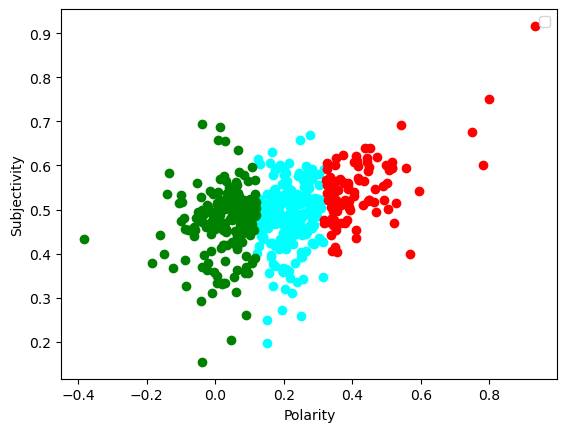

In [45]:
sr1 = srj2[srj2.km==0]
sr2 = srj2[srj2.km==1]
sr3 = srj2[srj2.km==2]

plt.scatter(sr1.Sentiment_Polarity, sr1.Sentiment_Subjectivity, color='cyan')
plt.scatter(sr2.Sentiment_Polarity, sr2.Sentiment_Subjectivity, color='red')
plt.scatter(sr3.Sentiment_Polarity, sr3.Sentiment_Subjectivity, color='green')

plt.xlabel('Sentiment Polarity')
plt.ylabel('Sentiment Subjectivity')
plt.legend()